In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
sns.set_theme()

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_chrombpnet_results/assembly/mm10/scores_merged"
summary_path = os.path.join(data_dir, "summary_u.tsv")
data_path = os.path.join(data_dir, "data_u.tsv")



# Summary Visualizations

Here, I visualize some summary statistics for each cell type across tested mouse peaks

In [3]:
summary = pd.read_csv(summary_path, sep='\t', header=0)
summary


label     fdr10  fdr1   fdr10_n  fdr1_n  npeaks  coverage
0     pCM-2  0.172602   0.0  0.089002     0.0  133266  5.604095
1      FB-3  0.501791   0.0  0.468129     0.0  117553  4.642712
2     pCM-3  0.000000   0.0  0.000000     0.0  166560  6.027319
3       Epi  0.726300   0.0  0.593569     0.0   80486  4.382432
4      EC-1  0.186355   0.0  0.090819     0.0  135918  5.372914
5       lEC  0.160477   0.0  0.083279     0.0  109667  4.832013
6      Endo  0.420821   0.0  0.428092     0.0  154586  5.544055
7   mCM-1-2  0.223236   0.0  0.166024     0.0  120272  4.903940
8      FB-2  0.587097   0.0  0.576756     0.0  152496  5.426870
9    SMC-PC  0.448203   0.0  0.447481     0.0   98259  4.626109
10    FB-CM  0.749011   0.0  0.373306     0.0   64194  3.948784
11  Other-1  0.351091   0.0  0.371402     0.0   25848  4.856778
12  Other-2  0.421460   0.0  0.422553     0.0   39311  4.024237
13  mCM-1-1  0.217350   0.0  0.333803     0.0   77327  4.376700
14    l-mCM  0.000000   0.0  0.000000     0.0   64354  4.166558
15  mCM-1-3  0.340514   0.0  0.183306     0.0  162804  5.819879
16     FB-1  0.000000   0.0  0.000000     0.0  106692  4.838299
17    dCM-2  0.000000   0.0  0.000000     0.0  246046  6.979297
18    Macro  0.000000   0.0  0.000000     0.0   68668  4.181930
19    pCM-1  0.095542   0.0  0.000000     0.0  121894  5.008693
20   tr-dCM  0.000000   0.0  0.000000     0.0  147091  5.253095

## Proportion of significant peaks for each cell type

The proportion of significant peaks in each cell type, at an FDR threshold of 10% and 1%. It looks like this proportion varies substantially across cell types for both thresholds. 

This could indicate cell-type-specific effects, but we want to account for possible confounders.

<AxesSubplot: xlabel='fdr10_n', ylabel='label'>

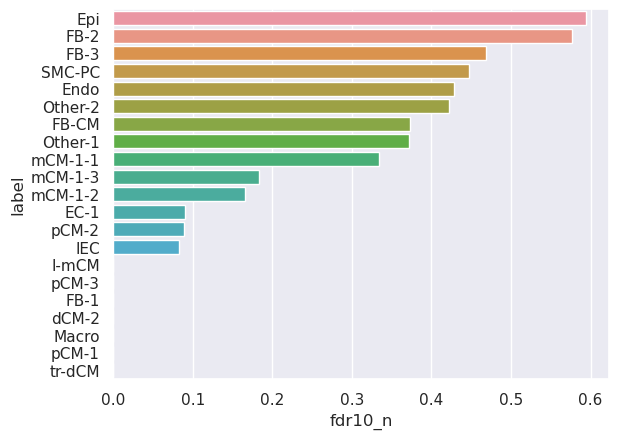

In [4]:
sns.barplot(data=summary, y="label", x="fdr10_n", order=summary.sort_values('fdr10_n', ascending=False).label)


<AxesSubplot: xlabel='fdr1_n', ylabel='label'>

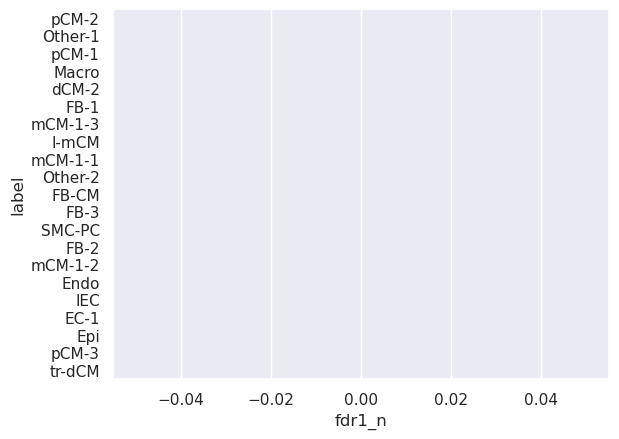

In [5]:
sns.barplot(data=summary, y="label", x="fdr1_n", order=summary.sort_values('fdr1_n', ascending=False).label)


## Significance vs. coverage

One potential confounder is varying read depths across cell types, which could impact model performance. 

Here, I plot the mean peak coverage (defined as log1p counts per peak) along with the proportion of significant peaks. They do not look correlated which indicates that the results are not confounded by coverage

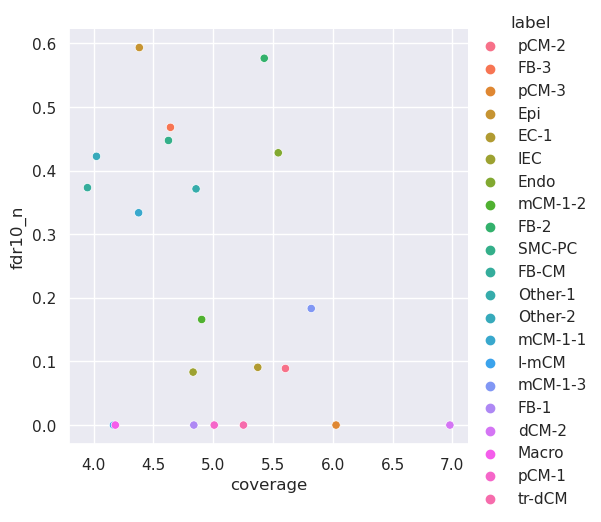

In [6]:
sns.relplot(data=summary, x="coverage", y="fdr10_n", hue="label")


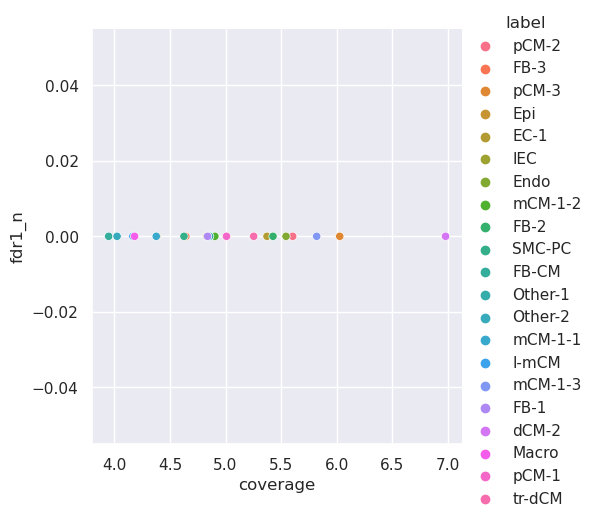

In [7]:
sns.relplot(data=summary, x="coverage", y="fdr1_n", hue="label")


## Significance vs. peak counts

Another potential confounder is the variable number of total peaks, since peak calling was done independently on each cell type. 

I plot the number of peaks along with the proportion of significant peaks. They do not look correlated either.

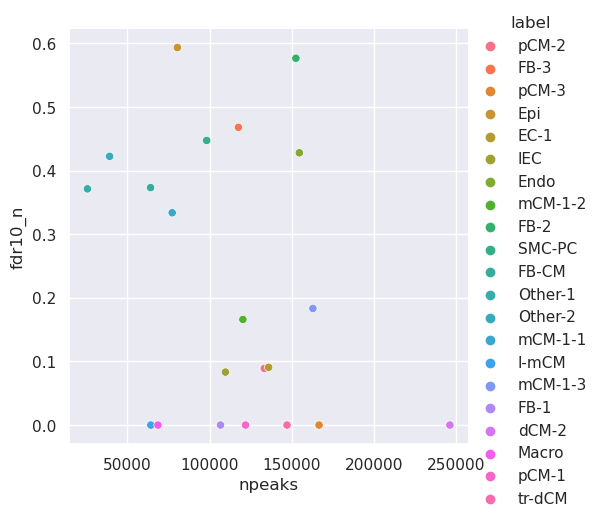

In [8]:
sns.relplot(data=summary, x="npeaks", y="fdr10_n", hue="label")


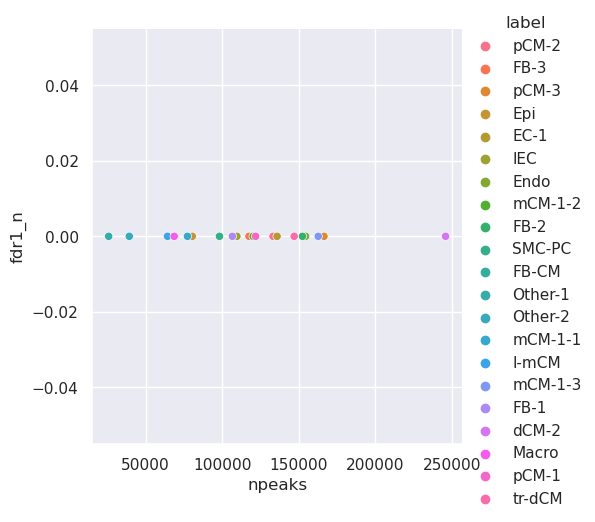

In [9]:
sns.relplot(data=summary, x="npeaks", y="fdr1_n", hue="label")


# Per-Peak Visualizations

Now, I look into the distributions of several metrics across individual mouse peaks.

In [10]:

data = pd.read_csv(data_path, sep='\t', header=0)
data

chrom  summit_pos  fold_0_ss  fold_1_ss  fold_0_xs  fold_1_xs  \
0         chr2     4880122   0.420022   0.811042   0.273851   0.346770   
1        chr17     8904608  -1.757059  -1.086476  -0.255937  -0.343425   
2        chr17    10297182  -1.835336  -1.390908  -0.900834  -1.282155   
3        chr17    10274743  -2.998055  -2.145326  -1.498713  -1.589689   
4        chr17    10267619  -2.104845  -1.627445  -1.457063  -1.178726   
...        ...         ...        ...        ...        ...        ...   
2393287  chr10   117116259  -0.443140  -0.479494  -0.453818  -0.754936   
2393288   chr8   122368228   0.082439  -0.454244  -0.003393  -0.153121   
2393289   chr1   152668549  -1.203659  -1.608940  -1.131108  -1.338917   
2393290   chr6   114403032  -0.224724  -0.406949  -0.497277  -0.612002   
2393291   chr5    23529663  -0.629543  -0.612770  -0.608712  -0.543549   

          ss_mean   xs_mean    ss_std    xs_std  ...  u_stat_ss  u_stat_xs  \
0        0.569333  0.221310  0.182912  0.134242  ...       25.0        0.0   
1       -1.494199 -0.382343  0.307567  0.148698  ...        0.0       25.0   
2       -1.748742 -1.131373  0.279716  0.157778  ...        0.0       25.0   
3       -2.456579 -1.495302  0.366621  0.186683  ...        0.0       25.0   
4       -1.683582 -1.279652  0.247032  0.155313  ...        0.0       25.0   
...           ...       ...       ...       ...  ...        ...        ...   
2393287 -0.582449 -0.611635  0.129932  0.139158  ...       13.0       12.0   
2393288 -0.014962  0.013100  0.271367  0.168411  ...       13.0       12.0   
2393289 -1.178678 -1.209328  0.327489  0.148654  ...       13.0       12.0   
2393290 -0.323889 -0.336403  0.135284  0.205672  ...       12.0       13.0   
2393291 -0.445312 -0.504212  0.214967  0.280026  ...       12.0       13.0   

          -log10p   -log10q  u_stat_ss_qn  u_stat_xs_qn  -log10p_qn  \
0        2.100371  1.175708          23.0           2.0    1.498311   
1        2.100371  1.175708           0.0          25.0    2.100371   
2        2.100371  1.175708           0.0          25.0    2.100371   
3        2.100371  1.175708           0.0          25.0    2.100371   
4        2.100371  1.175708           5.0          20.0    0.821617   
...           ...       ...           ...           ...         ...   
2393287 -0.000000 -0.000000          16.0           9.0    0.261521   
2393288 -0.000000 -0.000000          15.0          10.0    0.160851   
2393289 -0.000000 -0.000000          13.0          12.0   -0.000000   
2393290 -0.000000 -0.000000          14.0          11.0    0.075065   
2393291 -0.000000 -0.000000          12.0          13.0   -0.000000   

         -log10q_qn  log1p_true_counts   Label  
0          0.787343           6.747587   pCM-2  
1          1.049772           5.147494   pCM-2  
2          1.049772           5.023881   pCM-2  
3          1.049772           5.192957   pCM-2  
4          0.430777           4.997212   pCM-2  
...             ...                ...     ...  
2393287    0.119385           4.787492  tr-dCM  
2393288    0.071885           5.627621  tr-dCM  
2393289   -0.000000           5.075174  tr-dCM  
2393290    0.032364           4.406719  tr-dCM  
2393291   -0.000000           4.927254  tr-dCM  

[2393292 rows x 22 columns]

## Mean vs Variance per peak

Here, we look at the means and variances of divergence between species for each mouse peak.  

The x axis for each subplot is the difference of the predicted log10 counts from the GP models and the mouse models, averaged over 5 folds. A positive value indicates a greater prediction from the GP models relative to the mouse models.

The y axis is the estimated standard deviation across folds of the divergence between the two species' count outputs. A higher standard deviation indicates higher variances across folds.    
The color indicates the significance of the difference between species for each peak, as evaluated using the Mann-Whitney U test on quantile-normalized predictions. I also looked into using DESeq also but I its assumptions are geared towards observed counts from experimental data and aren't really appropiate for analyzing predicted counts from models (more below).

Here, we see basically no correlation between mean and variance, which directly contradicts with the assumptions made by DESeq. The exceptions are mCM-1-3, Other-2, and pCM-3, though these seem to be due to technical issues (more later).

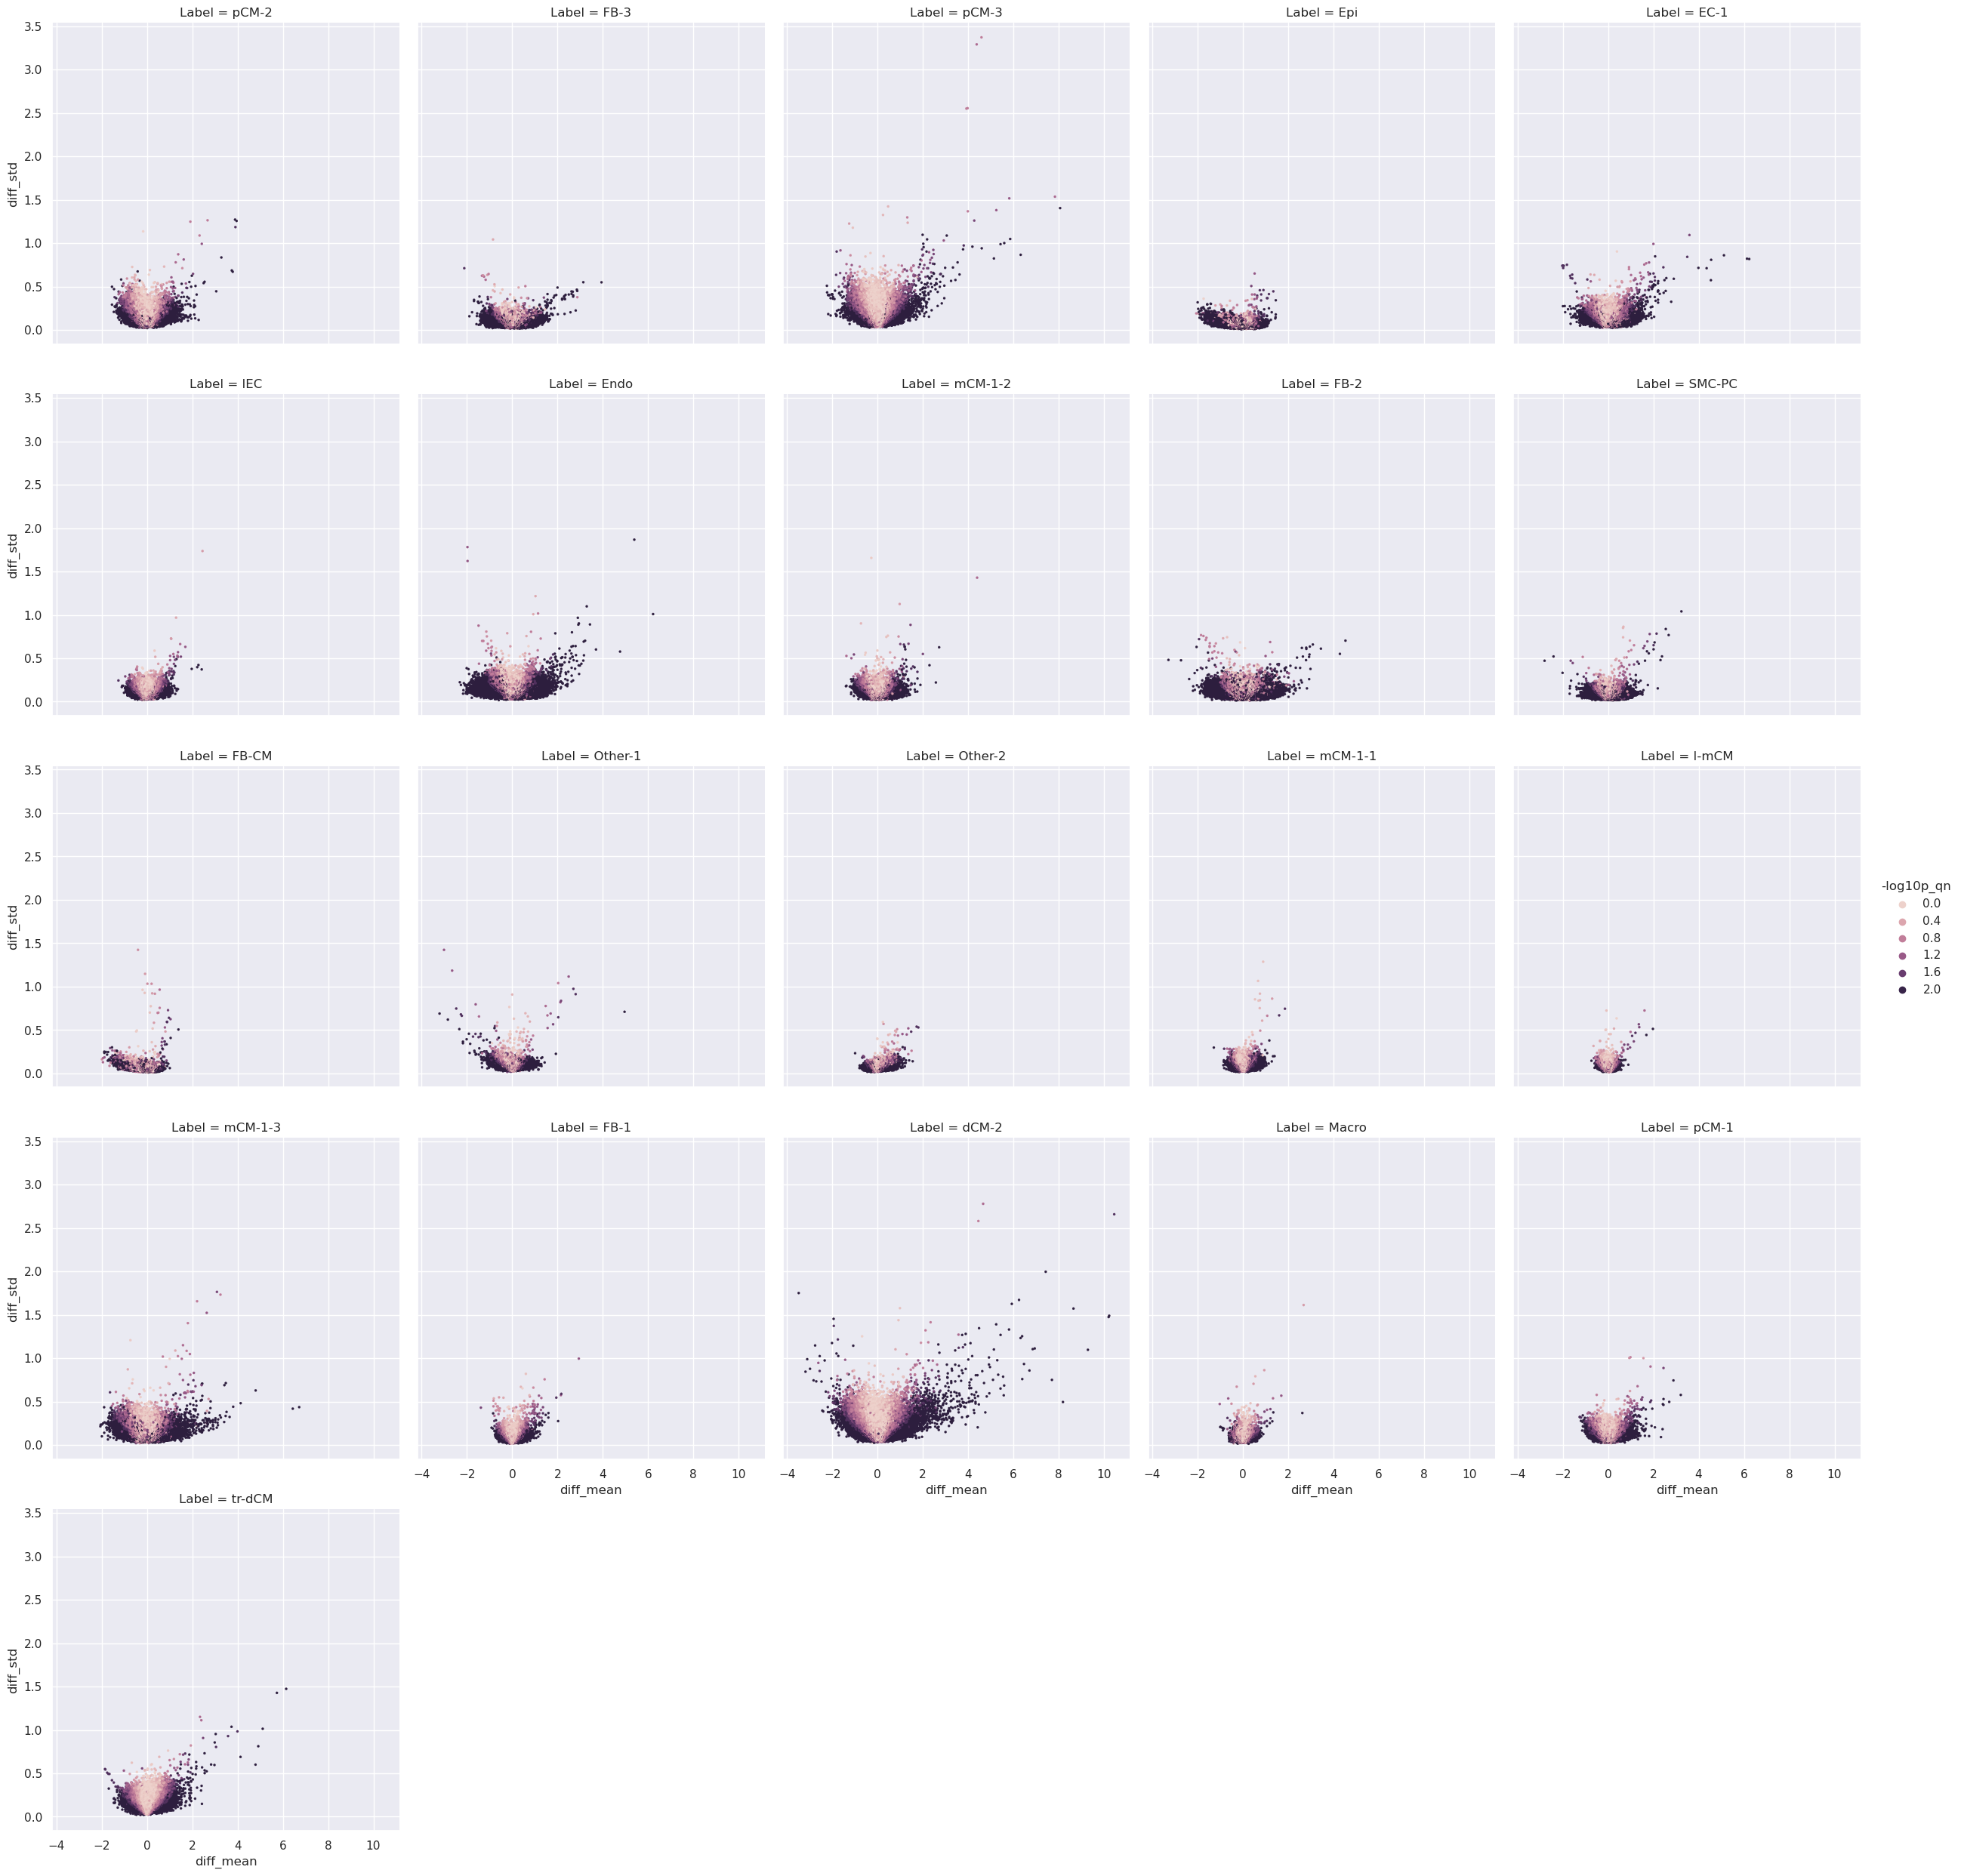

In [11]:
sns.relplot(data=data, x="diff_mean", y="diff_std", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Mouse vs. GP predictions

Next, we look at the mean predictions of the mouse and GP models on the mouse peaks.  

The x axis is the mean predicted log10 counts as predicted by the mouse models, averaged across 5 folds. The y axis is the mean predicted log10 counts as predicted by the GP models.

And as before, the color indicates the significance of the difference between species.

Note that within each species and each cell types, the predicted log counts are zero-centered across peaks to account for read depth differences across species. Thus, the intercept in the plots are always zero. 

For most cell types, the relationship between the axes is linear with a slope of 1. 

However, for some cell types, the slope is significantly different than 1 or even non-linear. I account for this when calculating significance by quantile-normalizing the predicted counts from each model. It is unclear whether this phenomenon is an artifact of training or represents real biology. 

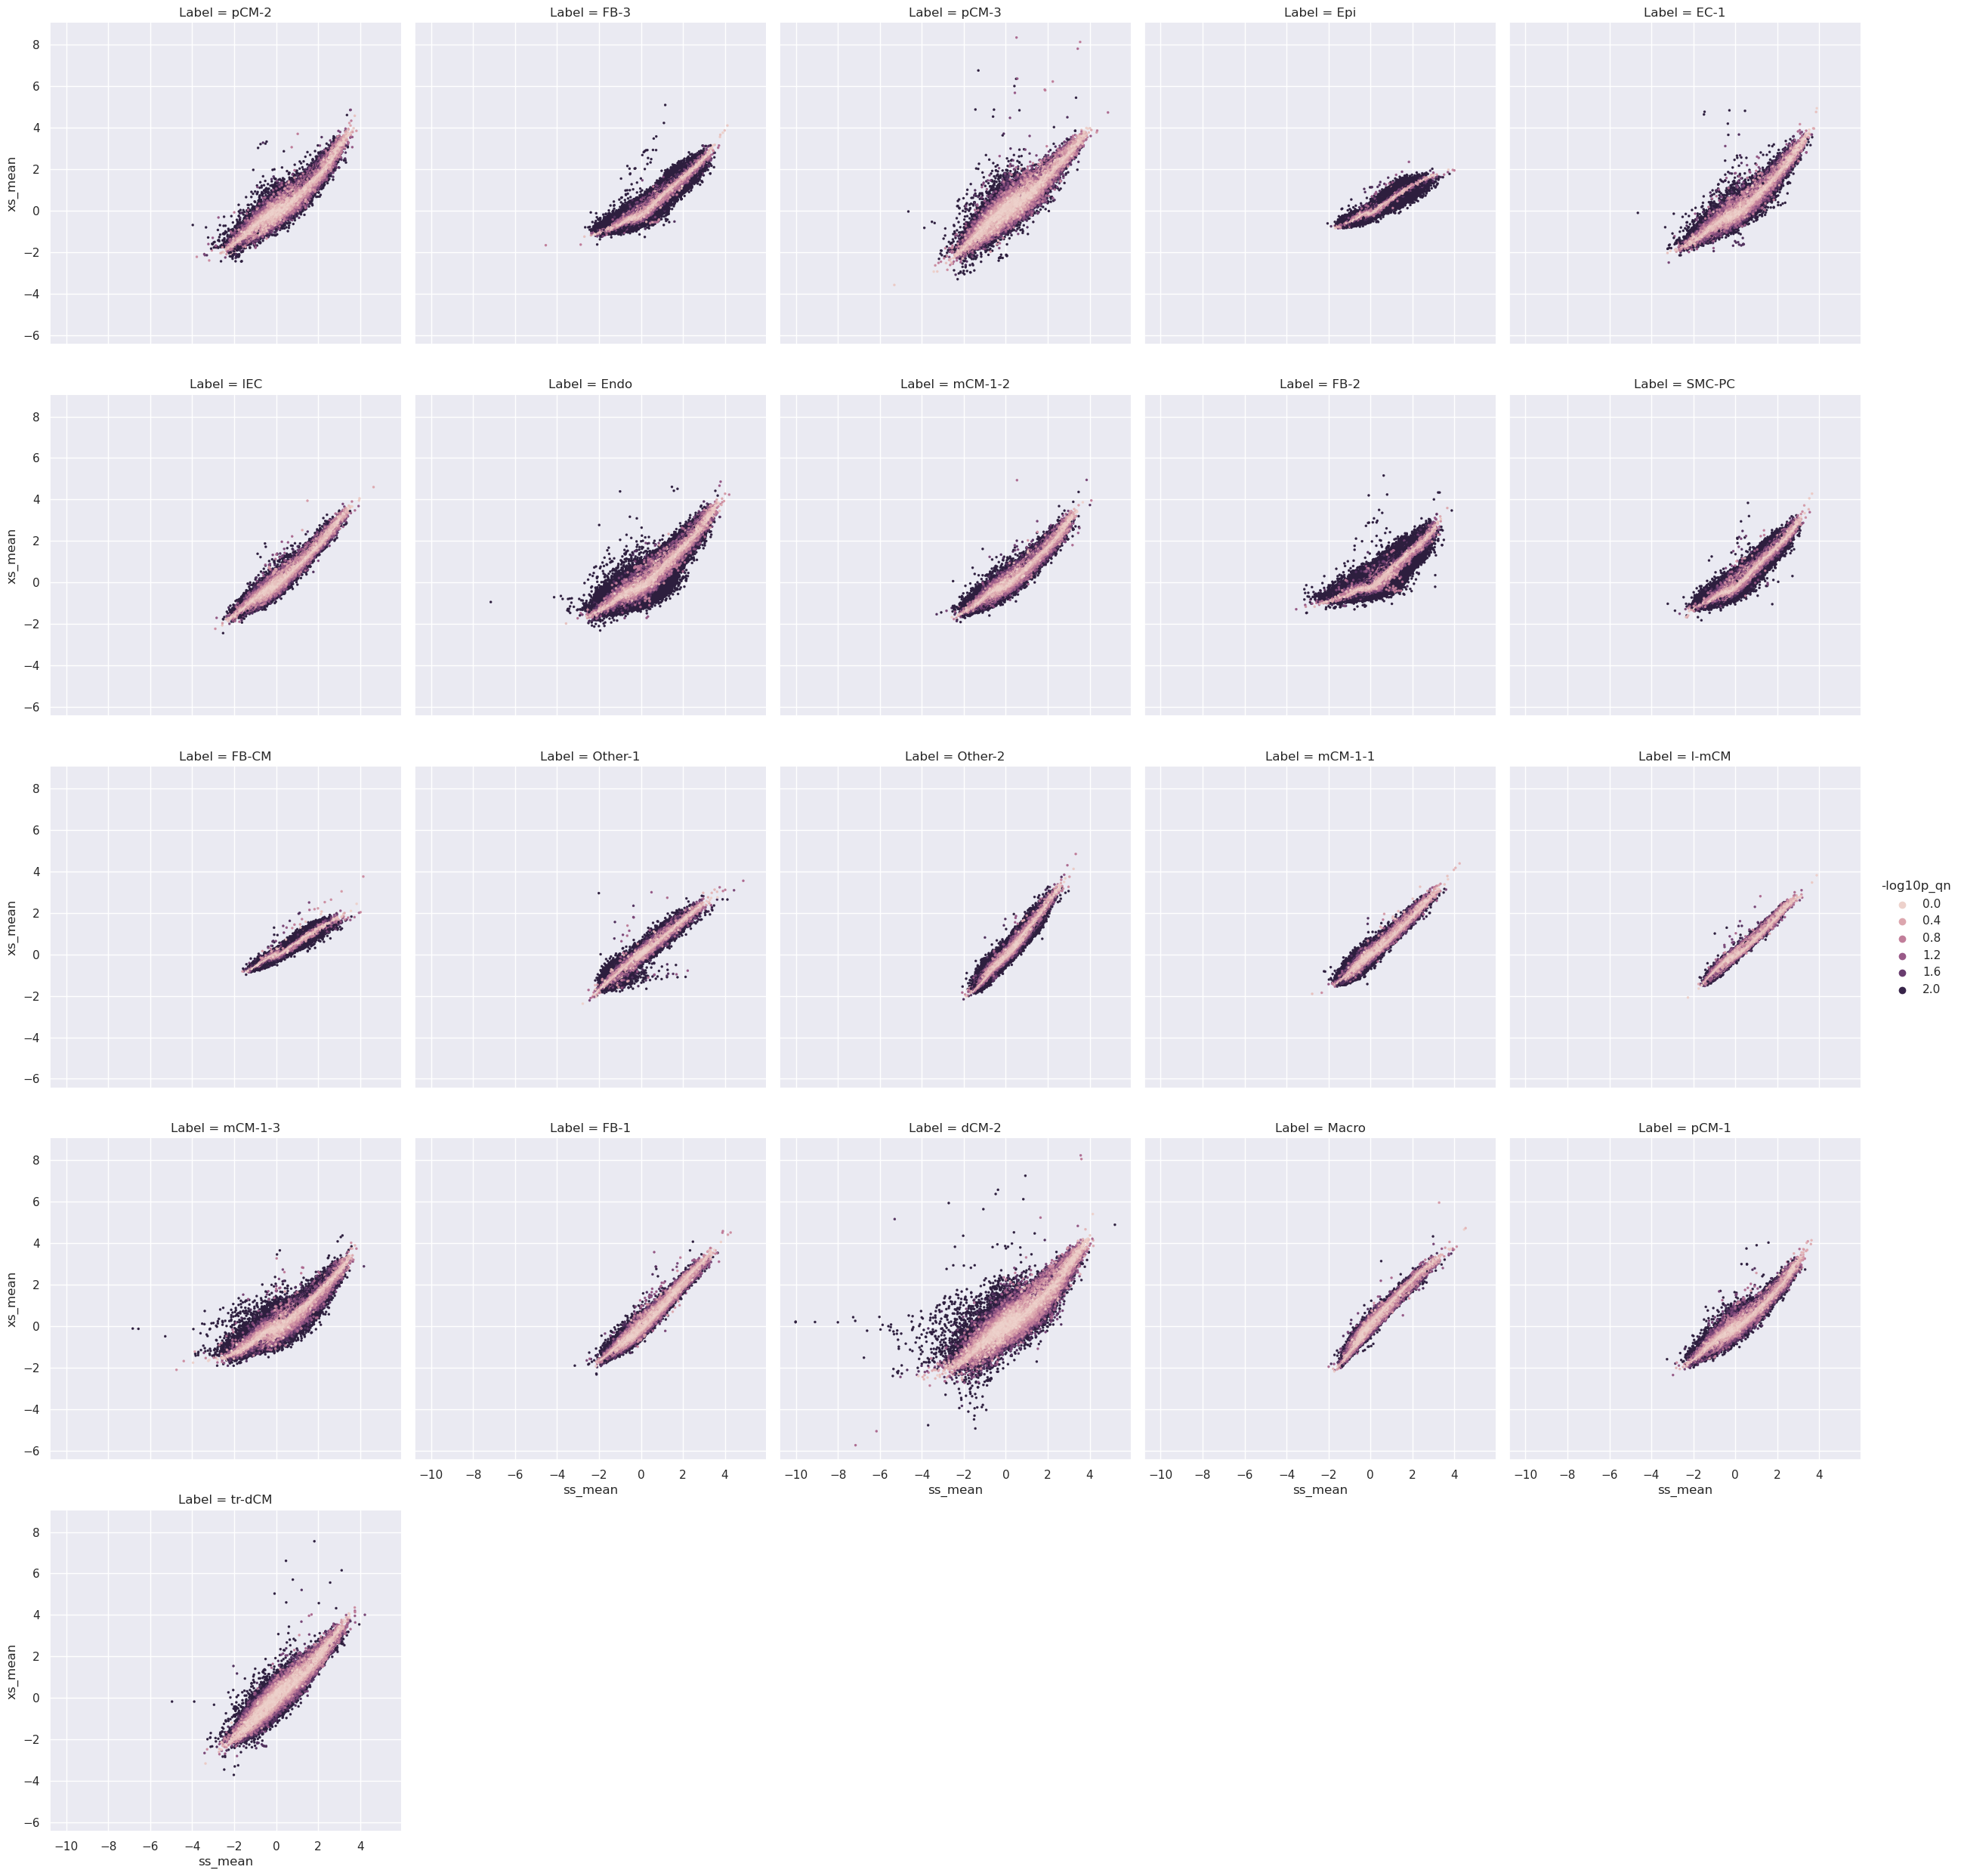

In [12]:
sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. True counts

We look a the fold 0 mouse model predictions compared the true counts on mouse peaks.  

The x axis is the predicted log10 counts as predicted by the mouse model. The y axis is the log1p true counts for the same peaks. Note that these values are on different scales but they are linearly related.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

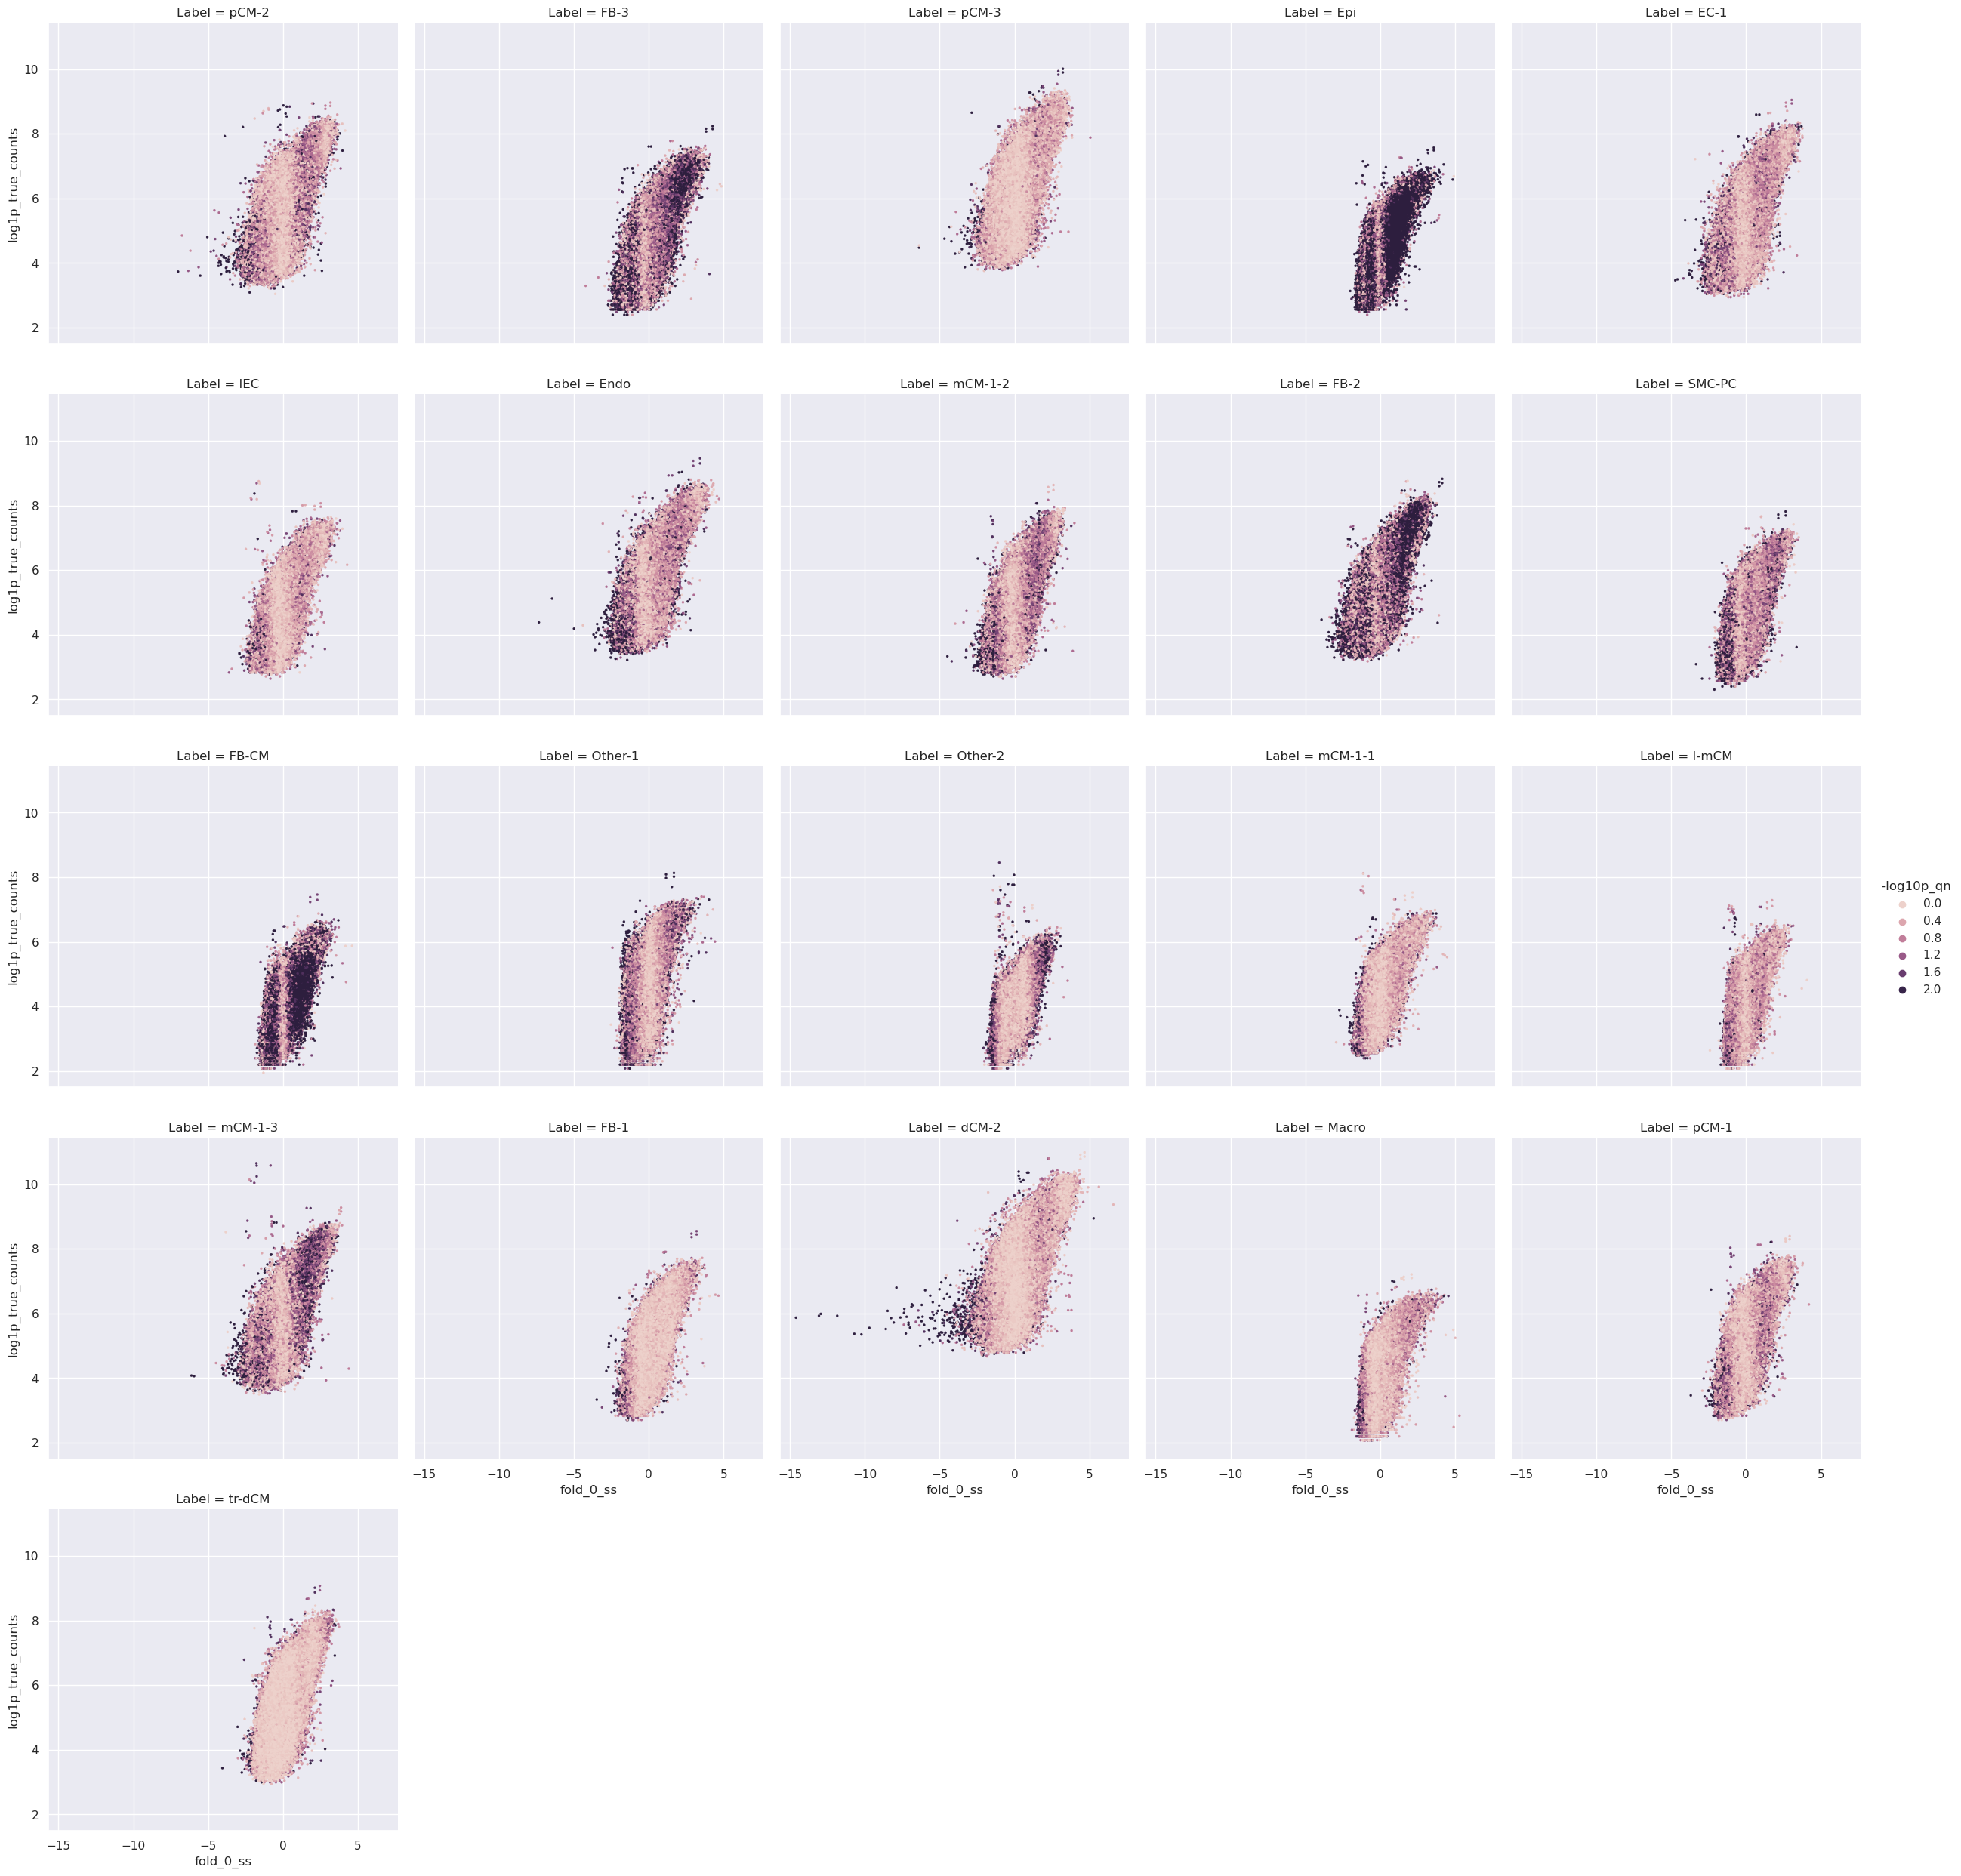

In [13]:
sns.relplot(data=data, x="fold_0_ss", y="log1p_true_counts", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. predicted counts

We look a the fold 0 mouse model predictions compared the fold 1 mouse model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 1 mouse model.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

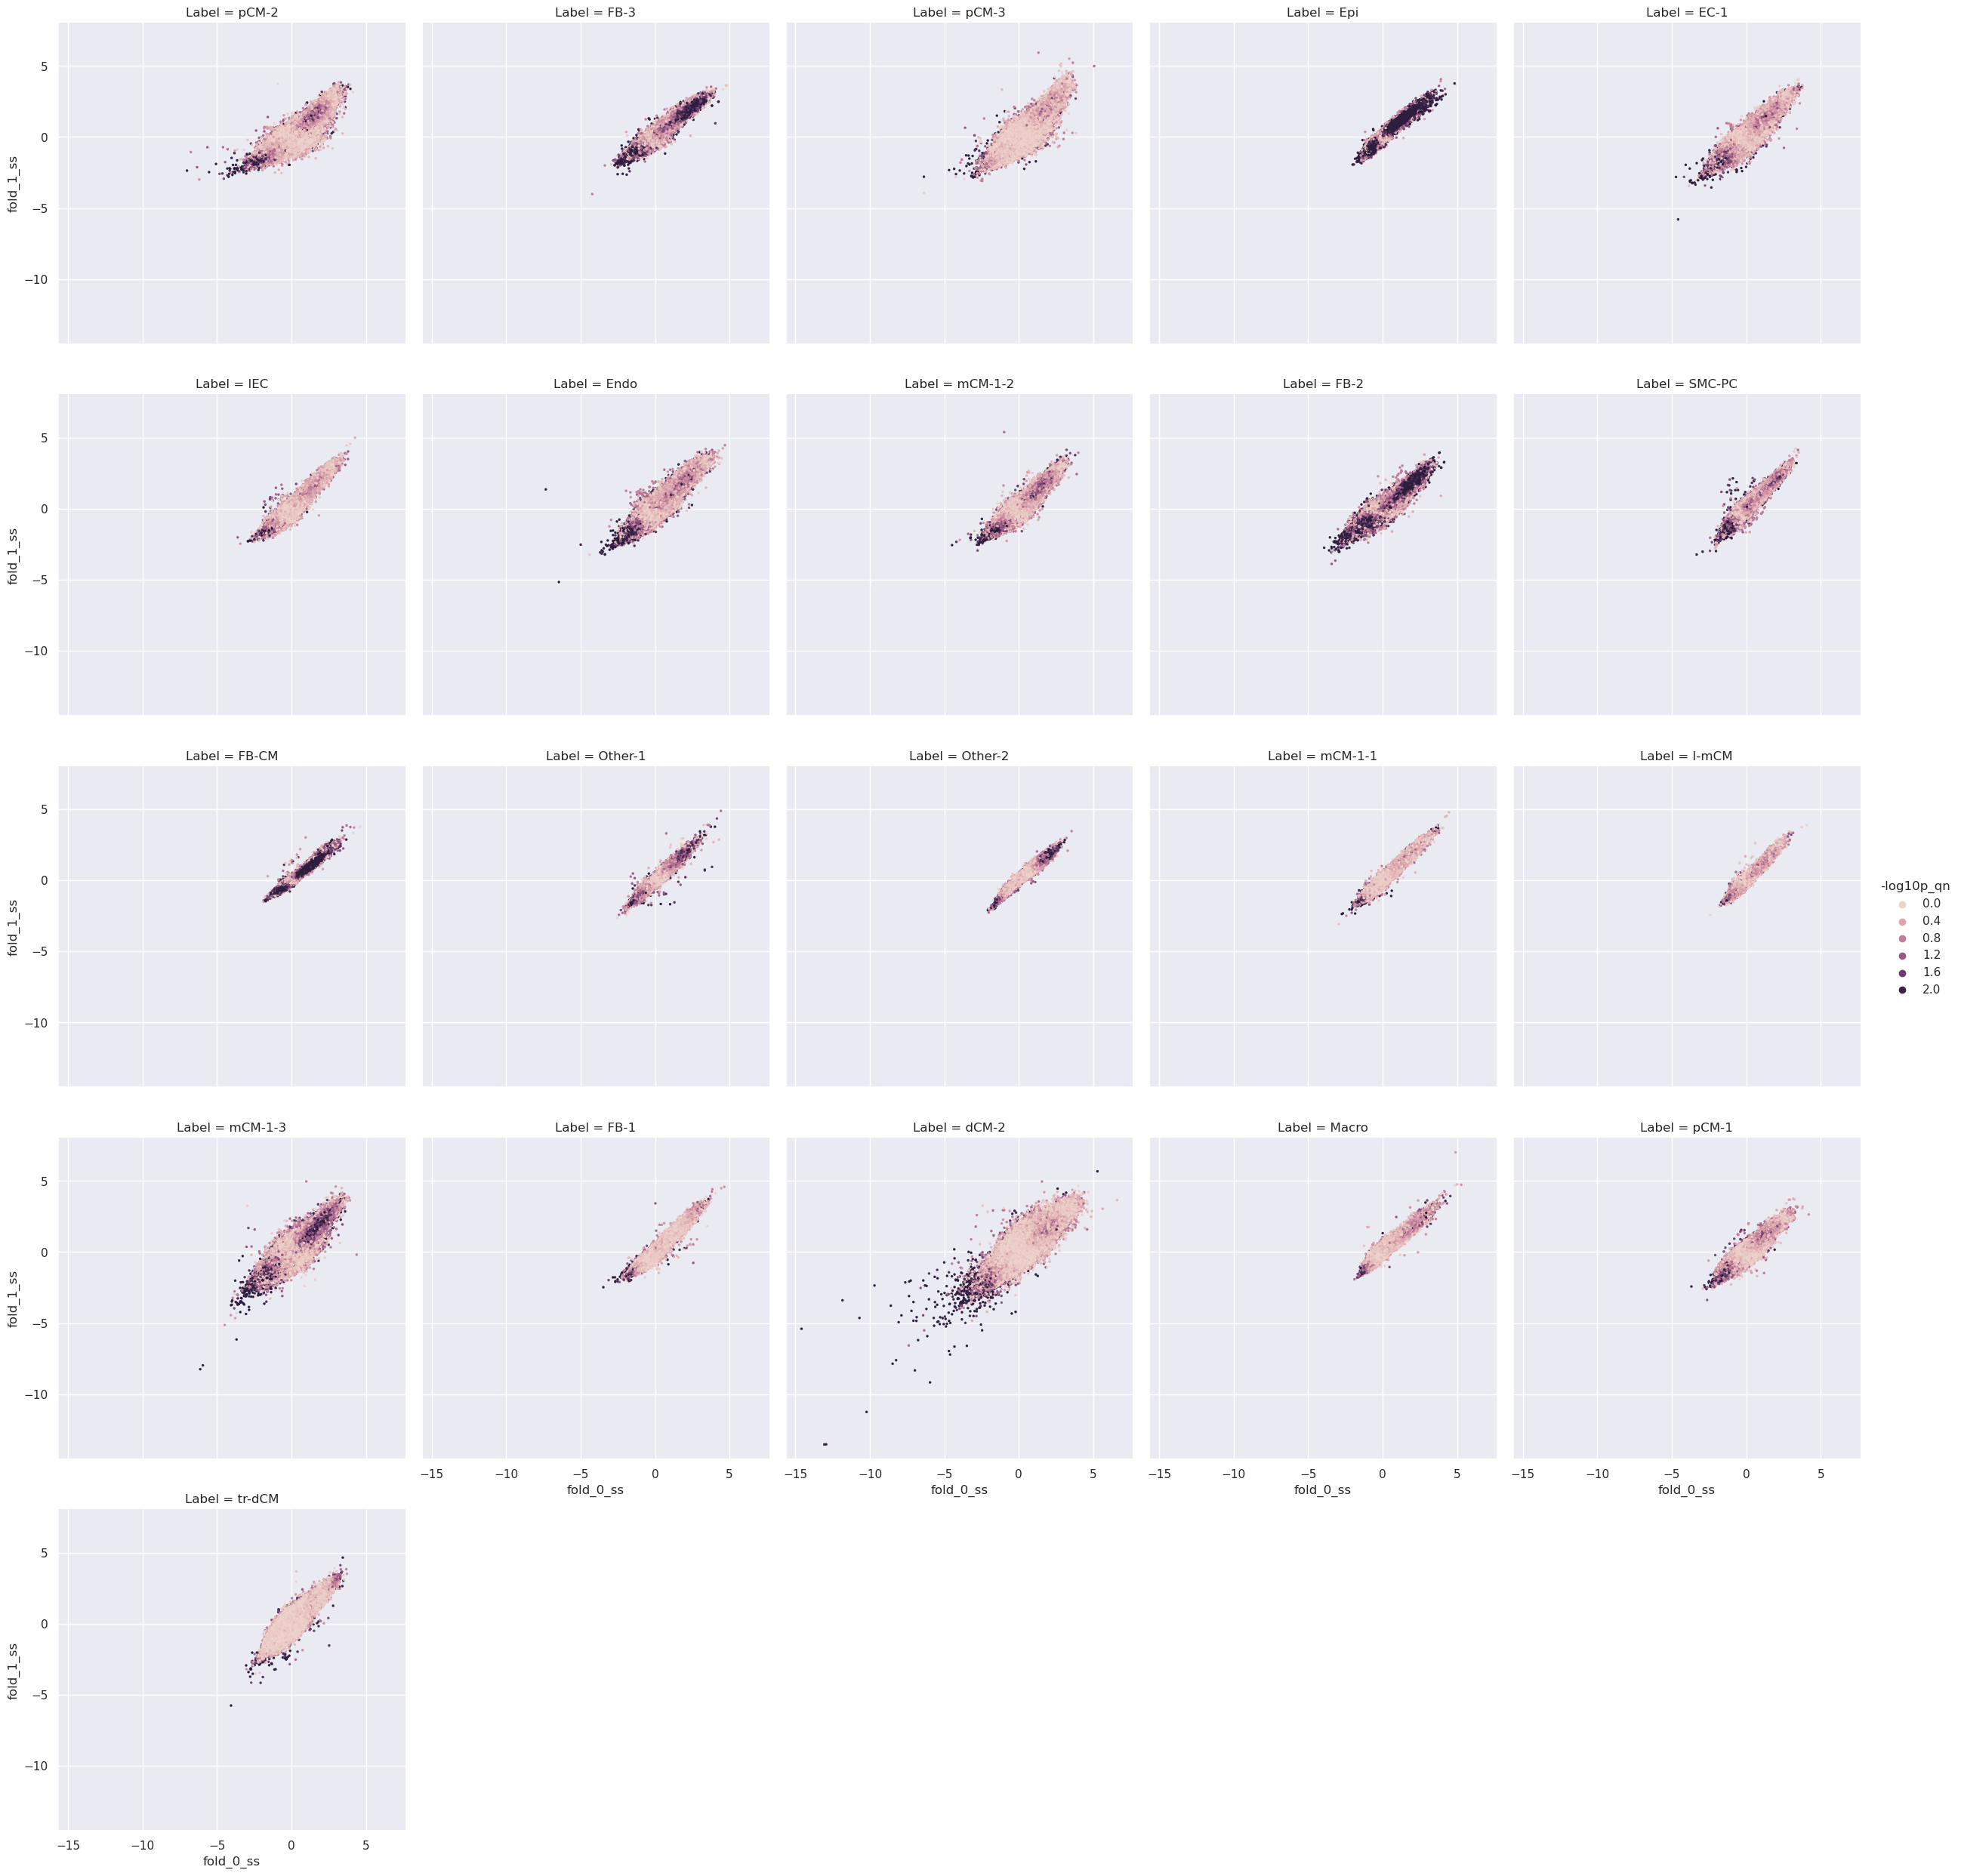

In [14]:
sns.relplot(data=data, x="fold_0_ss", y="fold_1_ss", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. cross-species predicted counts

We look a the fold 0 mouse model predictions compared the fold 0 GP model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 0 GP model.

And as before, the color indicates the significance of the difference between species.

As expected, significantly different peaks tend to be at the edges of the distribution

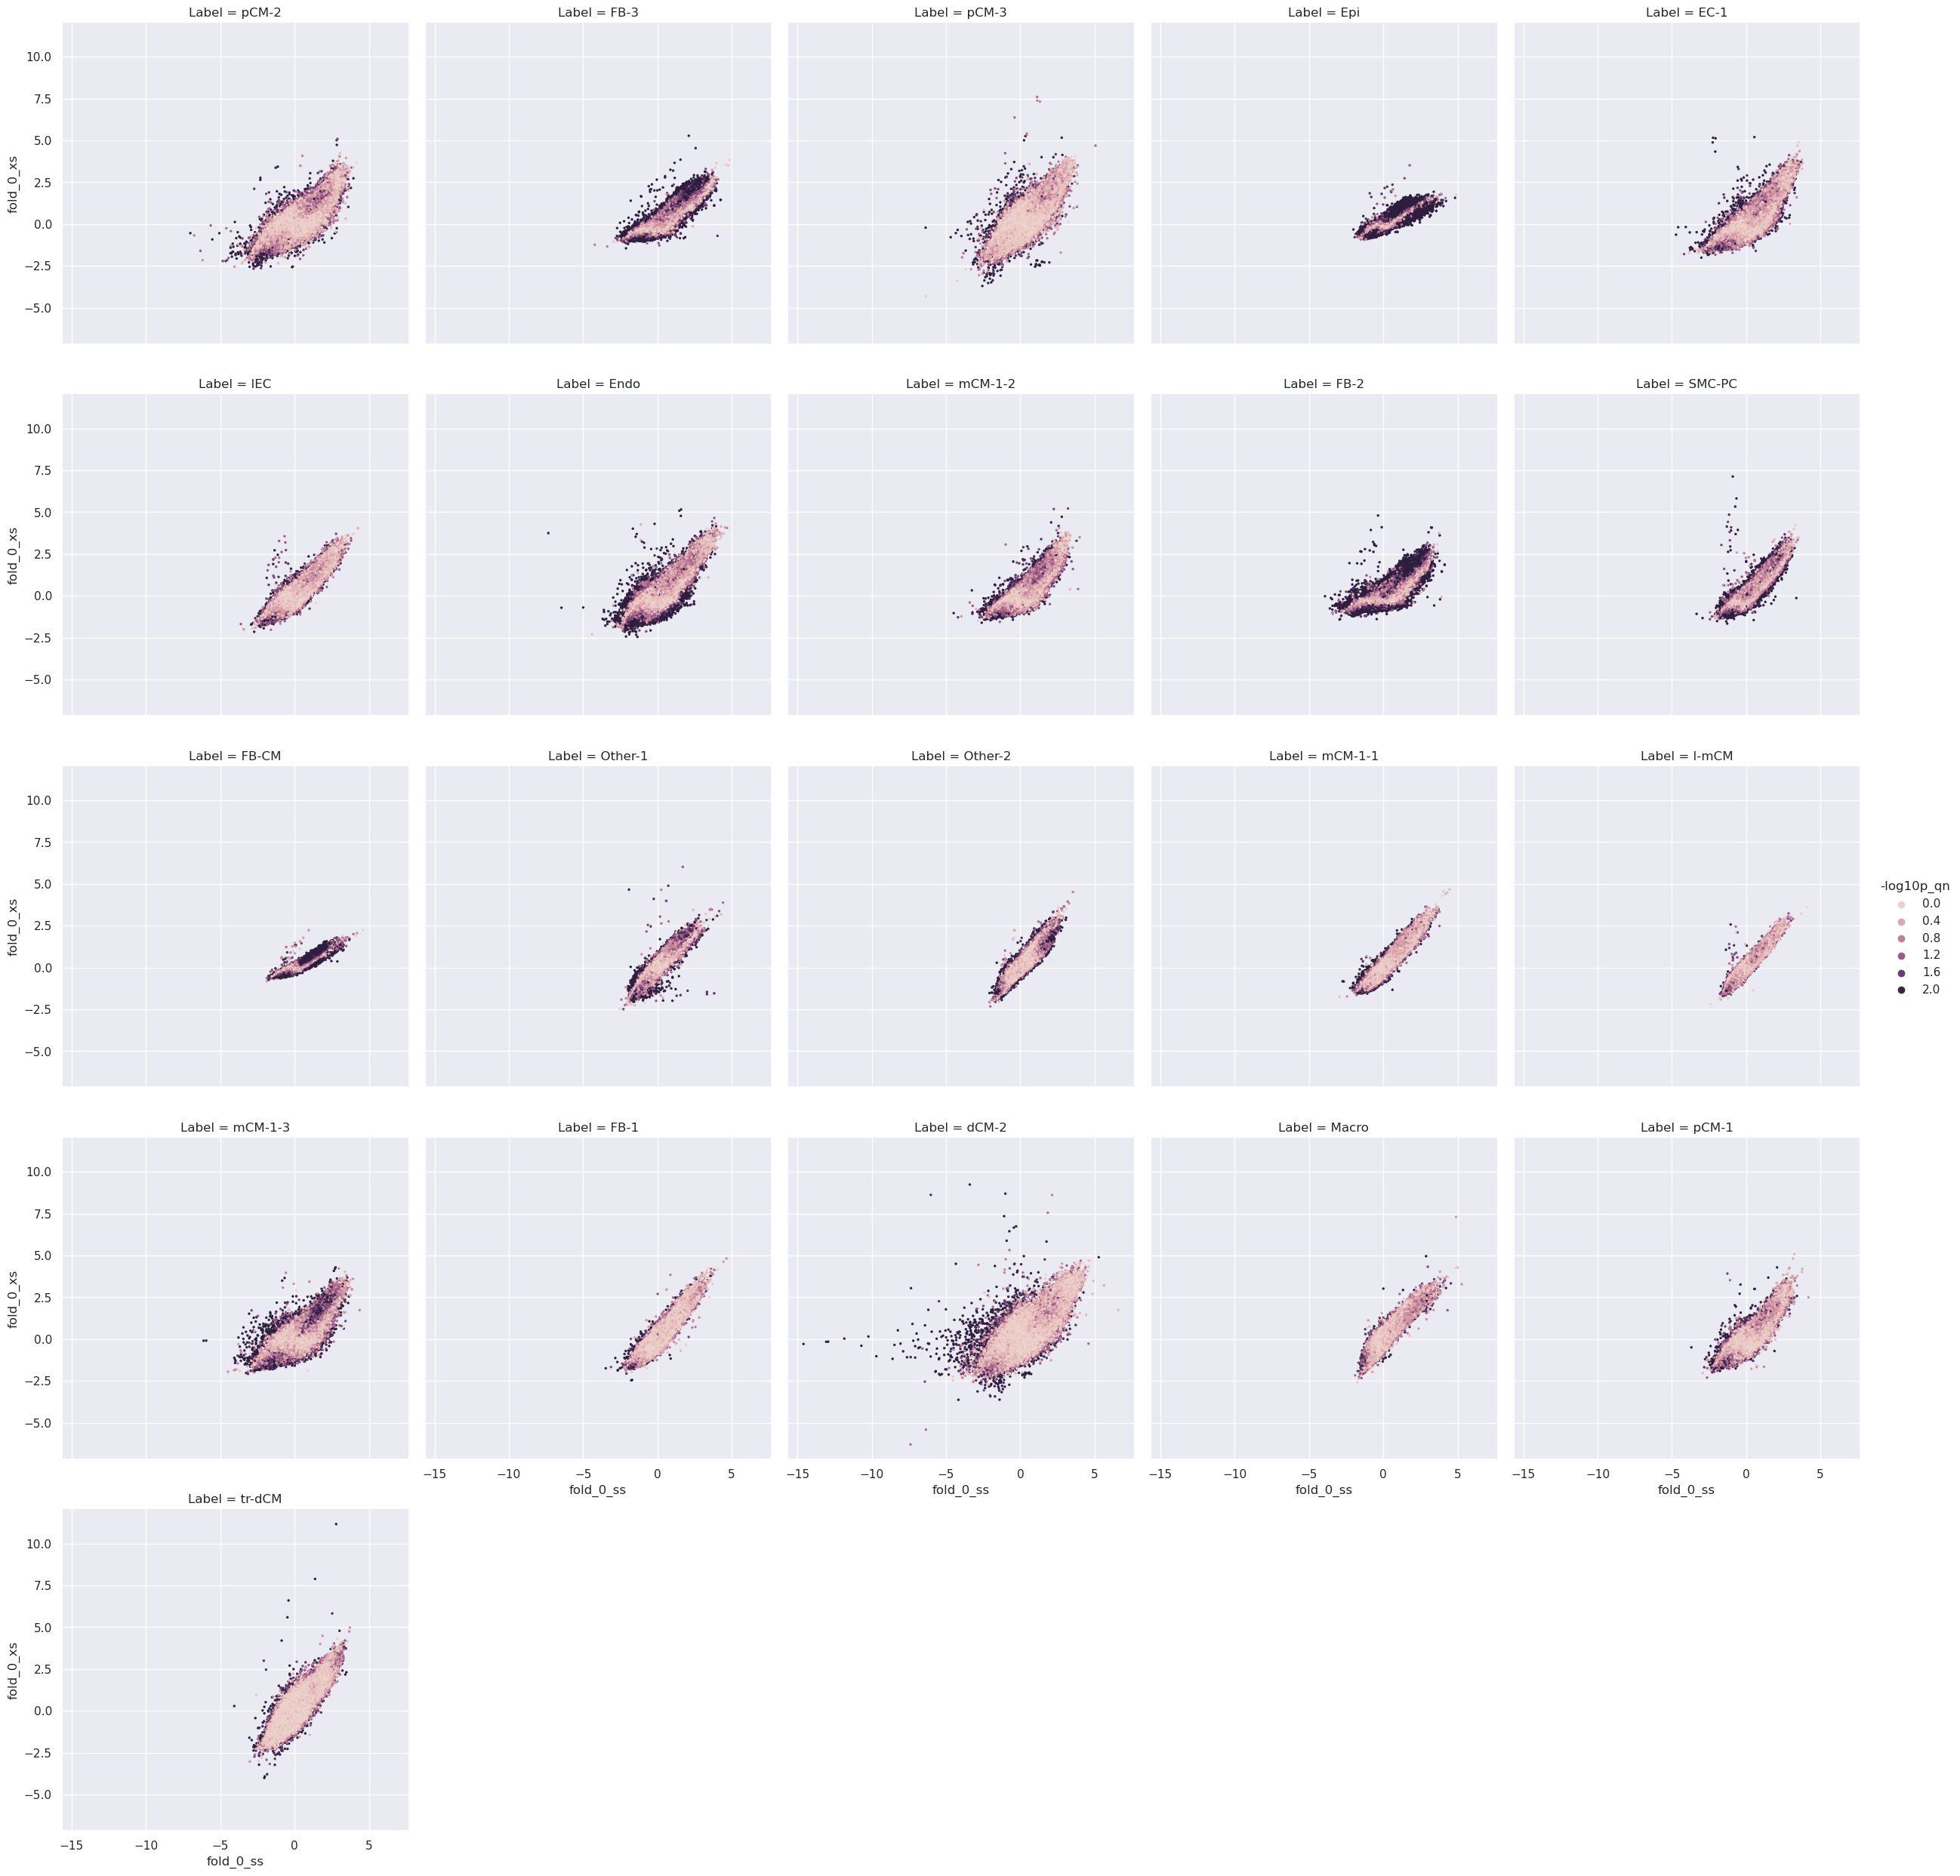

In [15]:
sns.relplot(data=data, x="fold_0_ss", y="fold_0_xs", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Quantitative cross-species prediction performance

Lastly, we look at the predictive cross_species performance for each cell type using spearman correlation across peaks.

SpearmanSame is the correlation of predicted counts from two folds of mouse model. This serves as an upper bound of cross-species predictive performance

SpearmanCross is the correlation of predicted counts from a mouse model with the predicted counts from the corresponding GP model. 

SpearmanObserved is the correlation of observed counts from a mouse model with true observed mouse counts.

We see that SpearmanCross is substantially closer to SpearmanSame than to SpearmanObserved, indicating that the predicted counts between two species correspond much more strongly than the predicted vs. true counts in the same species

In [16]:
from scipy import stats

grouped = data.groupby("Label")
header = ["Label", "SpearmanSame", "SpearmanCross", "SpearmanObserved"]
records = []
for name, group in grouped:
    fold_0_ss = group[['fold_0_ss']].to_numpy()
    fold_1_ss = group[['fold_1_ss']].to_numpy()
    fold_0_xs = group[['fold_0_xs']].to_numpy()
    observed = group[['log1p_true_counts']].to_numpy()
    corr_ss = stats.spearmanr(fold_0_ss, fold_1_ss).correlation
    corr_xs = stats.spearmanr(fold_0_ss, fold_0_xs).correlation
    corr_observed = stats.spearmanr(fold_0_ss, observed).correlation
    records.append([name, corr_ss, corr_xs, corr_observed])
    
corrs = pd.DataFrame.from_records(records, columns=header)
corrs

Label  SpearmanSame  SpearmanCross  SpearmanObserved
0      EC-1      0.918391       0.850169          0.741325
1      Endo      0.919469       0.801479          0.740185
2       Epi      0.968737       0.894602          0.775375
3      FB-1      0.954833       0.924396          0.733878
4      FB-2      0.918985       0.773677          0.753890
5      FB-3      0.942127       0.856249          0.738272
6     FB-CM      0.978523       0.947679          0.758052
7     Macro      0.954153       0.934741          0.747233
8   Other-1      0.974004       0.937242          0.715988
9   Other-2      0.983260       0.944193          0.813986
10   SMC-PC      0.954189       0.902205          0.754008
11    dCM-2      0.881675       0.806003          0.733150
12    l-mCM      0.976987       0.968869          0.770569
13      lEC      0.944926       0.898325          0.745962
14  mCM-1-1      0.969392       0.931784          0.772788
15  mCM-1-2      0.927165       0.867702          0.750473
16  mCM-1-3      0.896569       0.841672          0.770978
17    pCM-1      0.936644       0.903886          0.760001
18    pCM-2      0.896723       0.851666          0.774054
19    pCM-3      0.903053       0.858259          0.755894
20   tr-dCM      0.910306       0.867372          0.741711